<a href="https://colab.research.google.com/github/alvdarmawan/supreme-sniffle/blob/main/Python_Week_13_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Name: Alvin Darmawan<br>
Student ID: 1101194102<br>
Class: TT-43-G3</h1>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dmin = 200
dmax = 700
fc1 = 700 
fc2 = 900
fc3 = 1800
atype1 = 'Urban'
atype2 = 'Suburban'
atype3 = 'Open'
ht = 80 
hr = 1.5
users = 200
d = np.random.randint(dmin, dmax, users)

In [ ]:
def cost231(fc, atype, ht, hr, d):
  if fc in range(150, 1501):
    c1 = 69.55
    c2 = 26.16
  elif fc>1500 and fc <= 2000:
    c1 = 46.3
    c2 = 33.9
  else:
    print("[ERROR] Please only enter values inside the specified range.")
    
  if atype.lower() == 'urban':
    cm = 0
  elif atype.lower() == 'suburban':
    cm = -2*(np.log10(fc/28))**2 - 5.4
  elif atype.lower() == 'open':
    cm = -4.78*(np.log10(fc))**2 + 18.33*np.log10(fc) - 40.94
  else:
    print("[ERROR] Please pick one of the three area types.")
    
  a = (1.1*np.log10(fc) - 0.7)*hr - (1.56*np.log10(fc) - 0.8)
  Lp = c1 + c2*np.log10(fc) - 13.83*np.log10(ht) - a + (44.9 - 6.55*np.log10(ht))*np.log10(d) + cm
    
  return Lp

In [ ]:
LpUrban = cost231(fc3, atype1, ht, hr, d)
LpSuburb = cost231(fc3, atype2, ht, hr, d)
LpOpen = cost231(fc3, atype3, ht, hr, d)

In [ ]:
df = d[np.argsort(d)]
Urbanf = LpUrban[np.argsort(d)]
Suburbf = LpSuburb[np.argsort(d)]
Openf = LpOpen[np.argsort(d)]

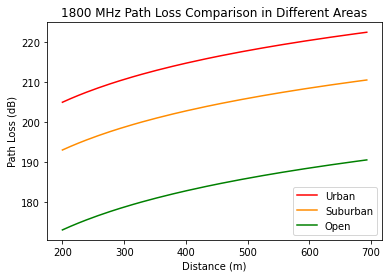

In [ ]:
plt.figure()
plt.plot(df, Urbanf, color = 'red')
plt.plot(df, Suburbf, color = 'darkorange')
plt.plot(df, Openf, color = 'green')
plt.title('1800 MHz Path Loss Comparison in Different Areas')
plt.xlabel('Distance (m)')
plt.ylabel('Path Loss (dB)')
plt.legend(['Urban', 'Suburban', 'Open'], loc = 'lower right')
plt.show()

In [ ]:
LpUrban2 = cost231(fc1, atype1, ht, hr, d)
LpUrban3 = cost231(fc2, atype1, ht, hr, d)

In [ ]:
Urbanf2 = LpUrban2[np.argsort(d)]
Urbanf3 = LpUrban3[np.argsort(d)]

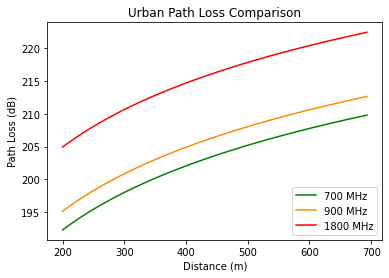

In [ ]:
plt.figure()
plt.plot(df, Urbanf2, color = 'green')
plt.plot(df, Urbanf3, color = 'darkorange')
plt.plot(df, Urbanf, color = 'red')
plt.title('Urban Path Loss Comparison')
plt.xlabel('Distance (m)')
plt.ylabel('Path Loss (dB)')
plt.legend(['700 MHz', '900 MHz', '1800 MHz'], loc = 'lower right')
plt.show()